In [192]:
!wget --no-check-certificate "https://docs.google.com/uc?export=download&id=1WsTJN-u4YRrPKqJTp8h8iUSAdfJC8_qn" -O houseprice.csv
#!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1GM3vMhalo6nkstKoCnE7cg_cSg179IJA' -O output.csv
#!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1mw4HxSPCgPonXshqNjVLZBAxUVeYHvY-' -O amazon_dataset.csv
#!wget --no-check-certificate "https://docs.google.com/uc?export=download&id=1ZsJWYHxcEdJQdb62diQf8o3fvXFawt1a" -O wine.csv

SYSTEM_WGETRC = c:/progra~1/wget/etc/wgetrc
syswgetrc = C:\Program Files (x86)\GnuWin32/etc/wgetrc
--2023-02-12 20:06:49--  https://docs.google.com/uc?export=download&id=1WsTJN-u4YRrPKqJTp8h8iUSAdfJC8_qn
Resolviendo docs.google.com... 142.250.78.142
Connecting to docs.google.com|142.250.78.142|:443... conectado.
  Unable to locally verify the issuer's authority.
Petici�n HTTP enviada, esperando respuesta... 303 See Other
Localizaci�n: https://doc-04-6c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/o4j5thpkbedpthke51clem3843ilpd2t/1676250375000/03070346628187686991/*/1WsTJN-u4YRrPKqJTp8h8iUSAdfJC8_qn?e=download&uuid=43d2fb3e-3f13-44eb-9926-fa3a5cf4a285 [siguiendo]
Atenci�n: no se admiten comodines en HTTP.
--2023-02-12 20:06:50--  https://doc-04-6c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/o4j5thpkbedpthke51clem3843ilpd2t/1676250375000/03070346628187686991/*/1WsTJN-u4YRrPKqJTp8h8iUSAdfJC8_qn?e=download&uuid=43d2fb3e-3f13-44eb-9

In [193]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score


In [194]:
df = pd.read_csv('houseprice.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [195]:
def show_distribution(df:pd.DataFrame, col:str):
    print(df[col].value_counts().describe())
    df.hist(col)

count      10.000000
mean      460.000000
std       730.853382
min         1.000000
25%         5.000000
50%        49.500000
75%       512.750000
max      2032.000000
Name: bedrooms, dtype: float64


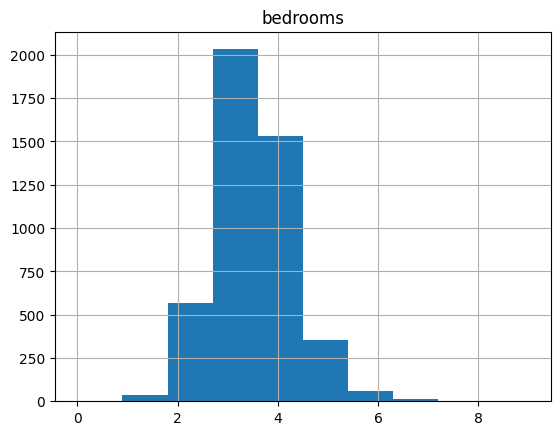

In [196]:
show_distribution(df, 'bedrooms')

count      26.000000
mean      176.923077
std       292.754904
min         1.000000
25%         3.250000
50%        23.000000
75%       248.750000
max      1189.000000
Name: bathrooms, dtype: float64


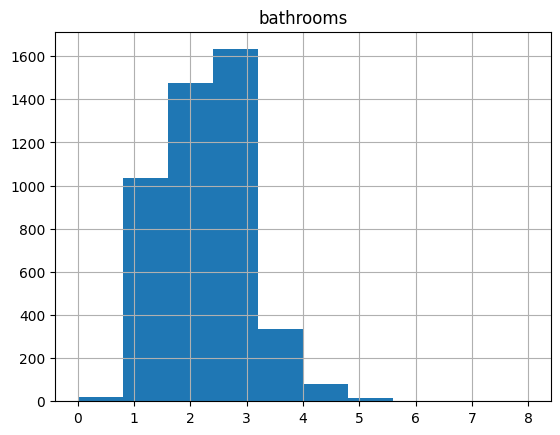

In [197]:
show_distribution(df, 'bathrooms')

count    566.000000
mean       8.127208
std        8.218352
min        1.000000
25%        1.000000
50%        4.000000
75%       14.000000
max       32.000000
Name: sqft_living, dtype: float64


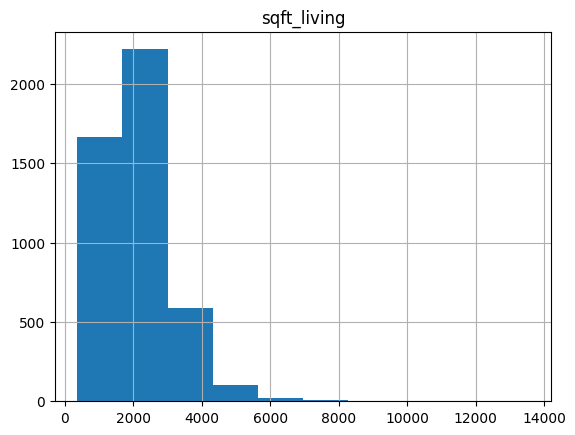

In [198]:
show_distribution(df, 'sqft_living')


count    3113.000000
mean        1.477674
std         2.785077
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        80.000000
Name: sqft_lot, dtype: float64


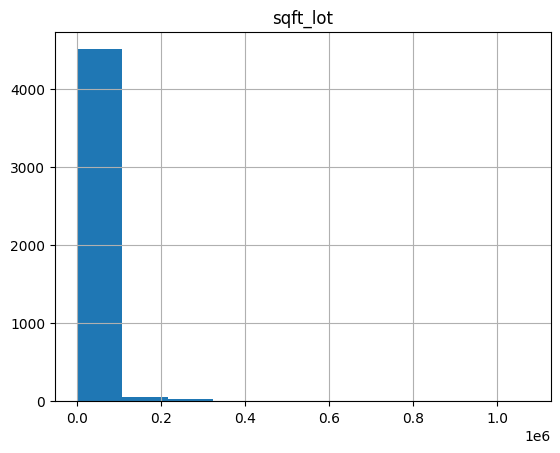

In [199]:
show_distribution(df, 'sqft_lot')

count       6.000000
mean      766.666667
std       968.972170
min         2.000000
25%        62.750000
50%       286.000000
75%      1469.250000
max      2174.000000
Name: floors, dtype: float64


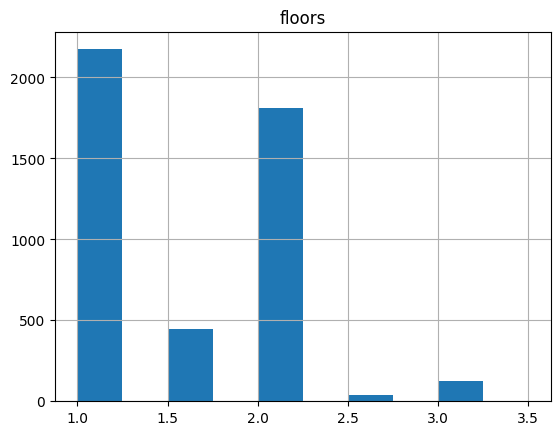

In [200]:
show_distribution(df, 'floors')


count       2.000000
mean     2300.000000
std      3206.022146
min        33.000000
25%      1166.500000
50%      2300.000000
75%      3433.500000
max      4567.000000
Name: waterfront, dtype: float64


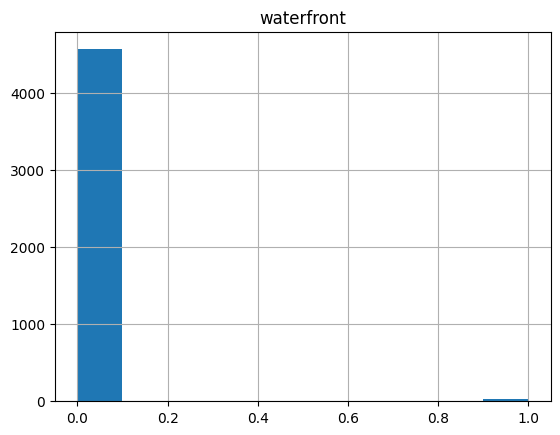

In [201]:
show_distribution(df, 'waterfront')

count       5.000000
mean      920.000000
std      1800.884644
min        69.000000
25%        70.000000
50%       116.000000
75%       205.000000
max      4140.000000
Name: view, dtype: float64


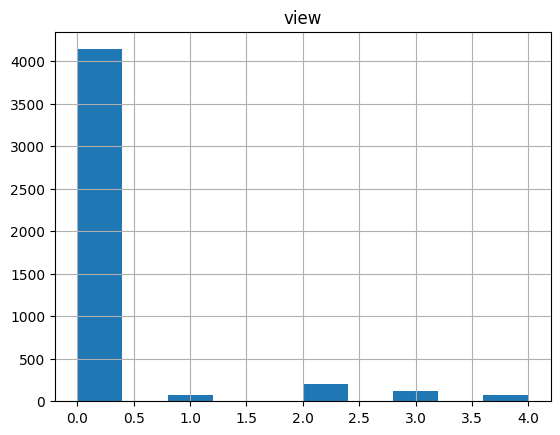

In [202]:
show_distribution(df, 'view')

count       5.000000
mean      920.000000
std      1203.267842
min         6.000000
25%        32.000000
50%       435.000000
75%      1252.000000
max      2875.000000
Name: condition, dtype: float64


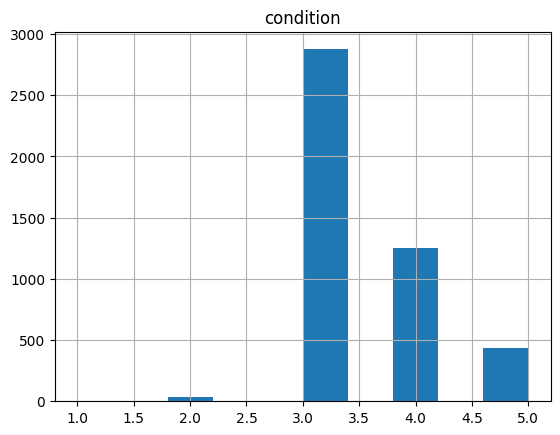

In [203]:
show_distribution(df, 'condition')


count    511.000000
mean       9.001957
std       10.124809
min        1.000000
25%        1.000000
50%        4.000000
75%       14.000000
max       47.000000
Name: sqft_above, dtype: float64


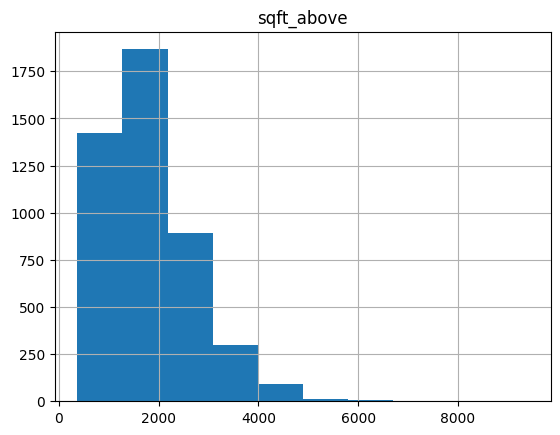

In [204]:
show_distribution(df, 'sqft_above')

count     207.000000
mean       22.222222
std       190.366812
min         1.000000
25%         2.000000
50%         7.000000
75%        13.000000
max      2745.000000
Name: sqft_basement, dtype: float64


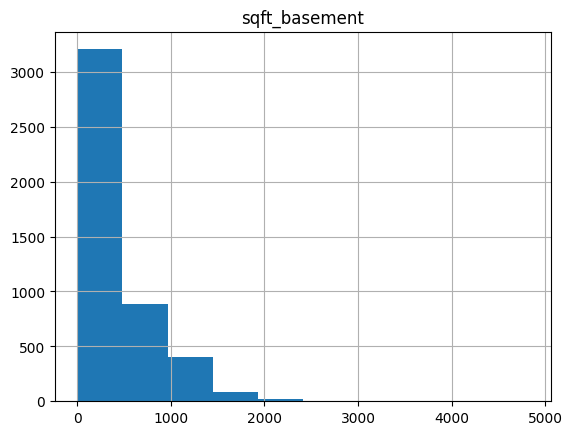

In [205]:
show_distribution(df, 'sqft_basement')

count    115.000000
mean      40.000000
std       24.014615
min        3.000000
25%       21.500000
50%       38.000000
75%       53.500000
max      111.000000
Name: yr_built, dtype: float64


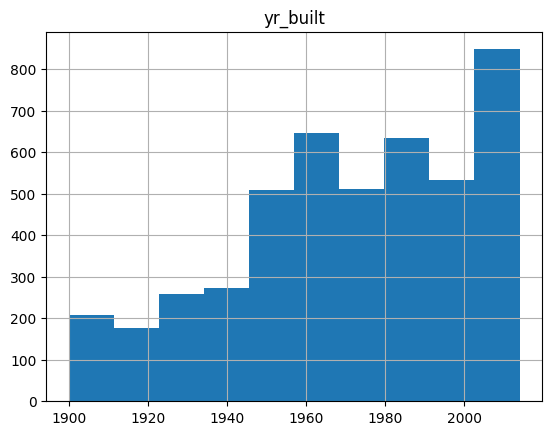

In [206]:
show_distribution(df, 'yr_built')

count      60.000000
mean       76.666667
std       350.937566
min         1.000000
25%         5.000000
50%        19.500000
75%        45.000000
max      2735.000000
Name: yr_renovated, dtype: float64


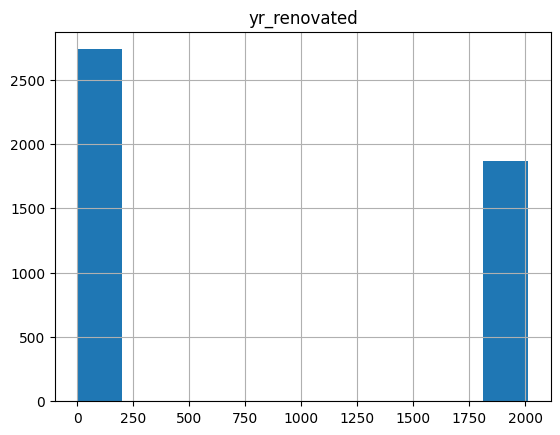

In [207]:
show_distribution(df, 'yr_renovated')

count    1741.000000
mean        2.642160
std         4.313709
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        49.000000
Name: price, dtype: float64


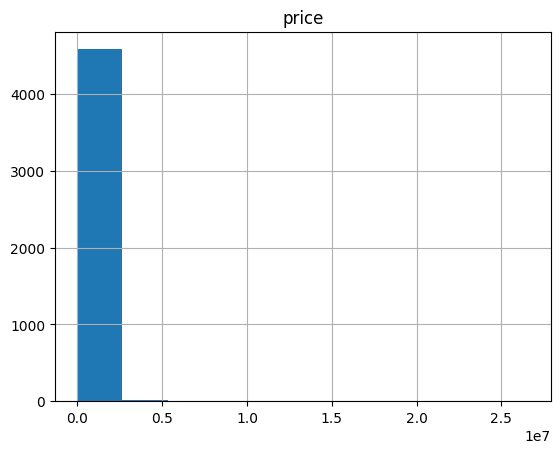

In [208]:
show_distribution(df, 'price')

In [209]:
df.corr().style.background_gradient(cmap="coolwarm")

C:\Users\j-mm1\AppData\Local\Temp\ipykernel_4880\1464306230.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().style.background_gradient(cmap="coolwarm")


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


In [210]:
reg = LinearRegression()

In [211]:
labels = df['price']
conv_dates = [1 if values == 2014 else 0 for values in df.date]
df['date'] = conv_dates
train1 = df.drop(['price','street','city','statezip','country'],axis=1)

In [212]:
X_train, X_test, y_train, y_test = train_test_split(train1, labels, test_size=0.25)

In [213]:
reg.fit(X_train, y_train)

LinearRegression()

In [214]:
reg.score(X_train, y_train)

0.18552766437253232

In [215]:
expected_y  = y_test
predicted_y = reg.predict(X_test)

In [216]:
mean_squared_error(y_test,predicted_y)

73538928793.72647

In [217]:
r2_score(y_test,predicted_y)

0.467707888717078

In [218]:
from joblib import dump, load

In [219]:
dump(reg, 'model.joblib') 

['model.joblib']

In [220]:
model_loaded = load('model.joblib') 

In [221]:
model_loaded.predict(X_test[0:1])

array([567577.60267481])

In [222]:
X_test[0:1]

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
2820,0,3.0,2.5,1940,9000,1.0,0,0,4,970,970,1948,0
